### Building an Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's build the neural network

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Alternative way to do it:

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

These are some of the model methods:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers

In [7]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [8]:
model.get_layer('dense') is hidden1

True

In [9]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.052488  , -0.03578681, -0.03987957, ...,  0.02934485,
        -0.02095286,  0.04618391],
       [-0.04411649, -0.01073213, -0.03962234, ...,  0.05728731,
        -0.0367093 ,  0.0711619 ],
       [ 0.02088258,  0.05071633, -0.02536994, ...,  0.07321277,
        -0.01528526, -0.01454018],
       ...,
       [-0.0505949 , -0.04277045,  0.02028588, ..., -0.01257673,
        -0.0184291 , -0.06678636],
       [ 0.00454833, -0.06785291, -0.00732266, ...,  0.0205863 ,
         0.04351181, -0.02099873],
       [ 0.0406781 ,  0.05248535,  0.06078523, ...,  0.00138068,
         0.03897342, -0.06004918]], dtype=float32)

After the model is created we need to compile it specifying the loss function and optimizer

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0239 - accuracy: 0.6826 - val_loss: 0.5120 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5091 - accuracy: 0.8238 - val_loss: 0.4639 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4515 - accuracy: 0.8422 - val_loss: 0.4322 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4276 - accuracy: 0.8521 - val_loss: 0.3978 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4094 - accuracy: 0.8548 - val_loss: 0.4135 - val_accuracy: 0.8582
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3859 - accuracy: 0.8648 - val_loss: 0.3819 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3673 - accuracy: 0.8717 - val_loss: 0.3721 - val_accuracy:

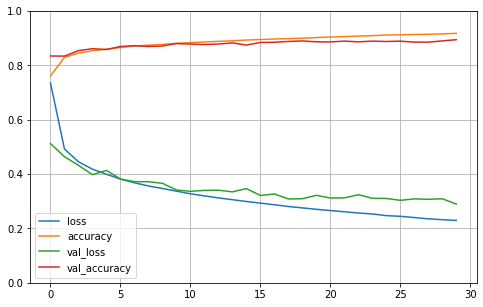

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 69.4080 - accuracy: 0.8393


[69.40803527832031, 0.8392999768257141]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

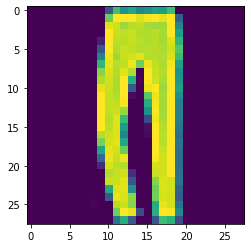

In [27]:
plt.imshow(X_new[2].reshape((28,28)))

In [29]:
class_names[np.argmax(y_proba[2])]

'Trouser'